# Exercise - 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
car = pd.read_csv(filename)
car.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### Checking dimnesion of data frame and the data type of each column

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

Shape of the dataframe is - 201, 29

#### Correlation between engine size and price#### 

In [4]:
correlation = car.corr()
correlation['price']['engine-size']

0.8723351674455199

#### Identify variables with positive or negative correlation with price

In [5]:
for i in car.describe().columns:
    temp = correlation['price'][i]
    if (temp > 0):
       print(i)

normalized-losses
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
price
city-L/100km
diesel


#### Datatype of Peak RPM

In [6]:
type(car['peak-rpm'][1])

numpy.float64

#### Plotting relation between engine size and price using Seaborn

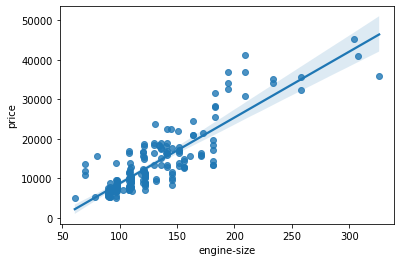

In [7]:
sns.regplot('engine-size', 'price', data=car)

#### Seeing other columns which can affect price

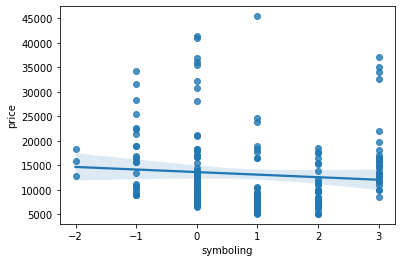

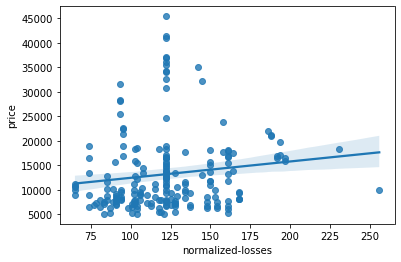

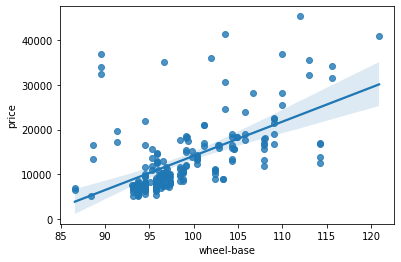

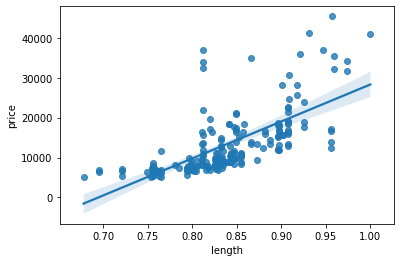

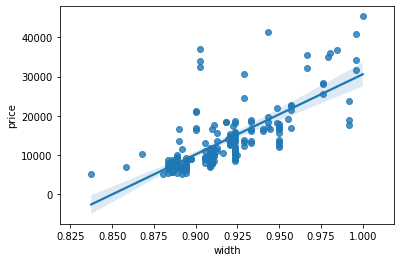

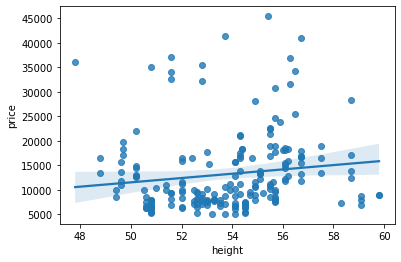

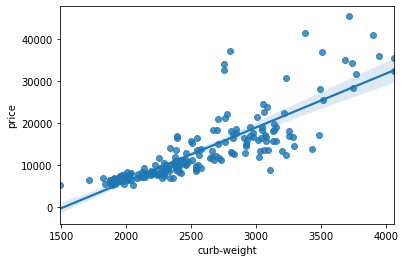

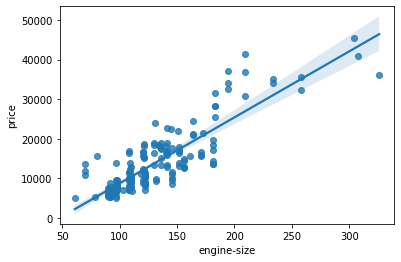

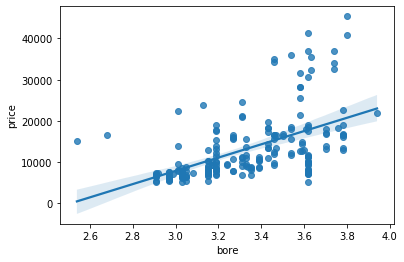

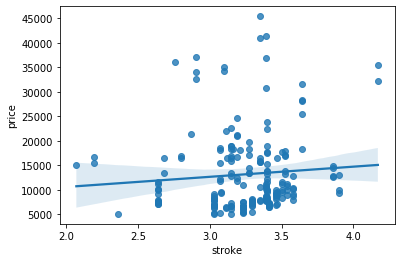

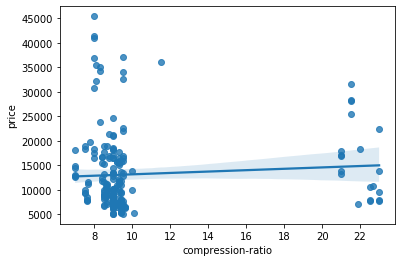

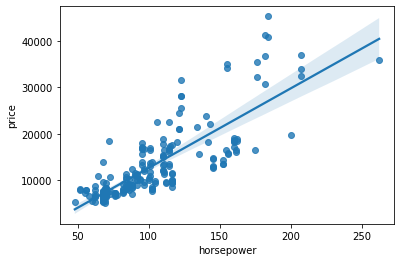

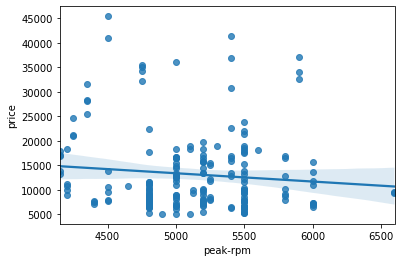

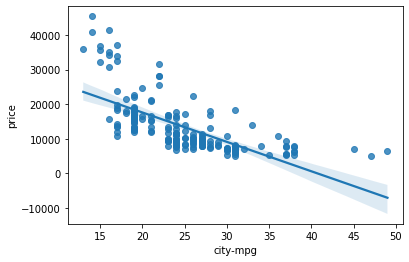

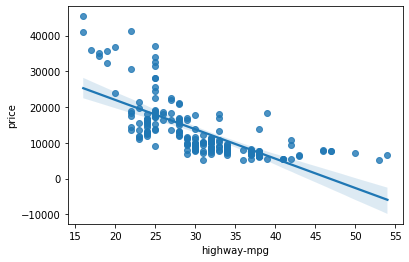

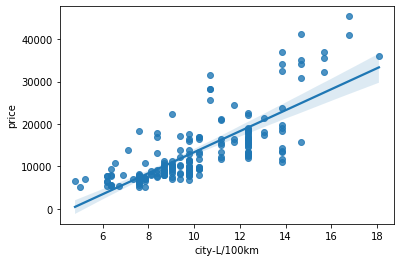

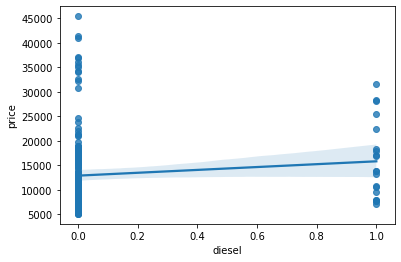

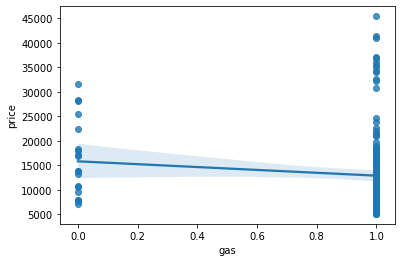

In [8]:
for i in car.describe().columns:
    if i!='price':
        sns.regplot(y='price', x=i, data = car)
        plt.show()

#### Plotting a pairplot to see which variables can affect price

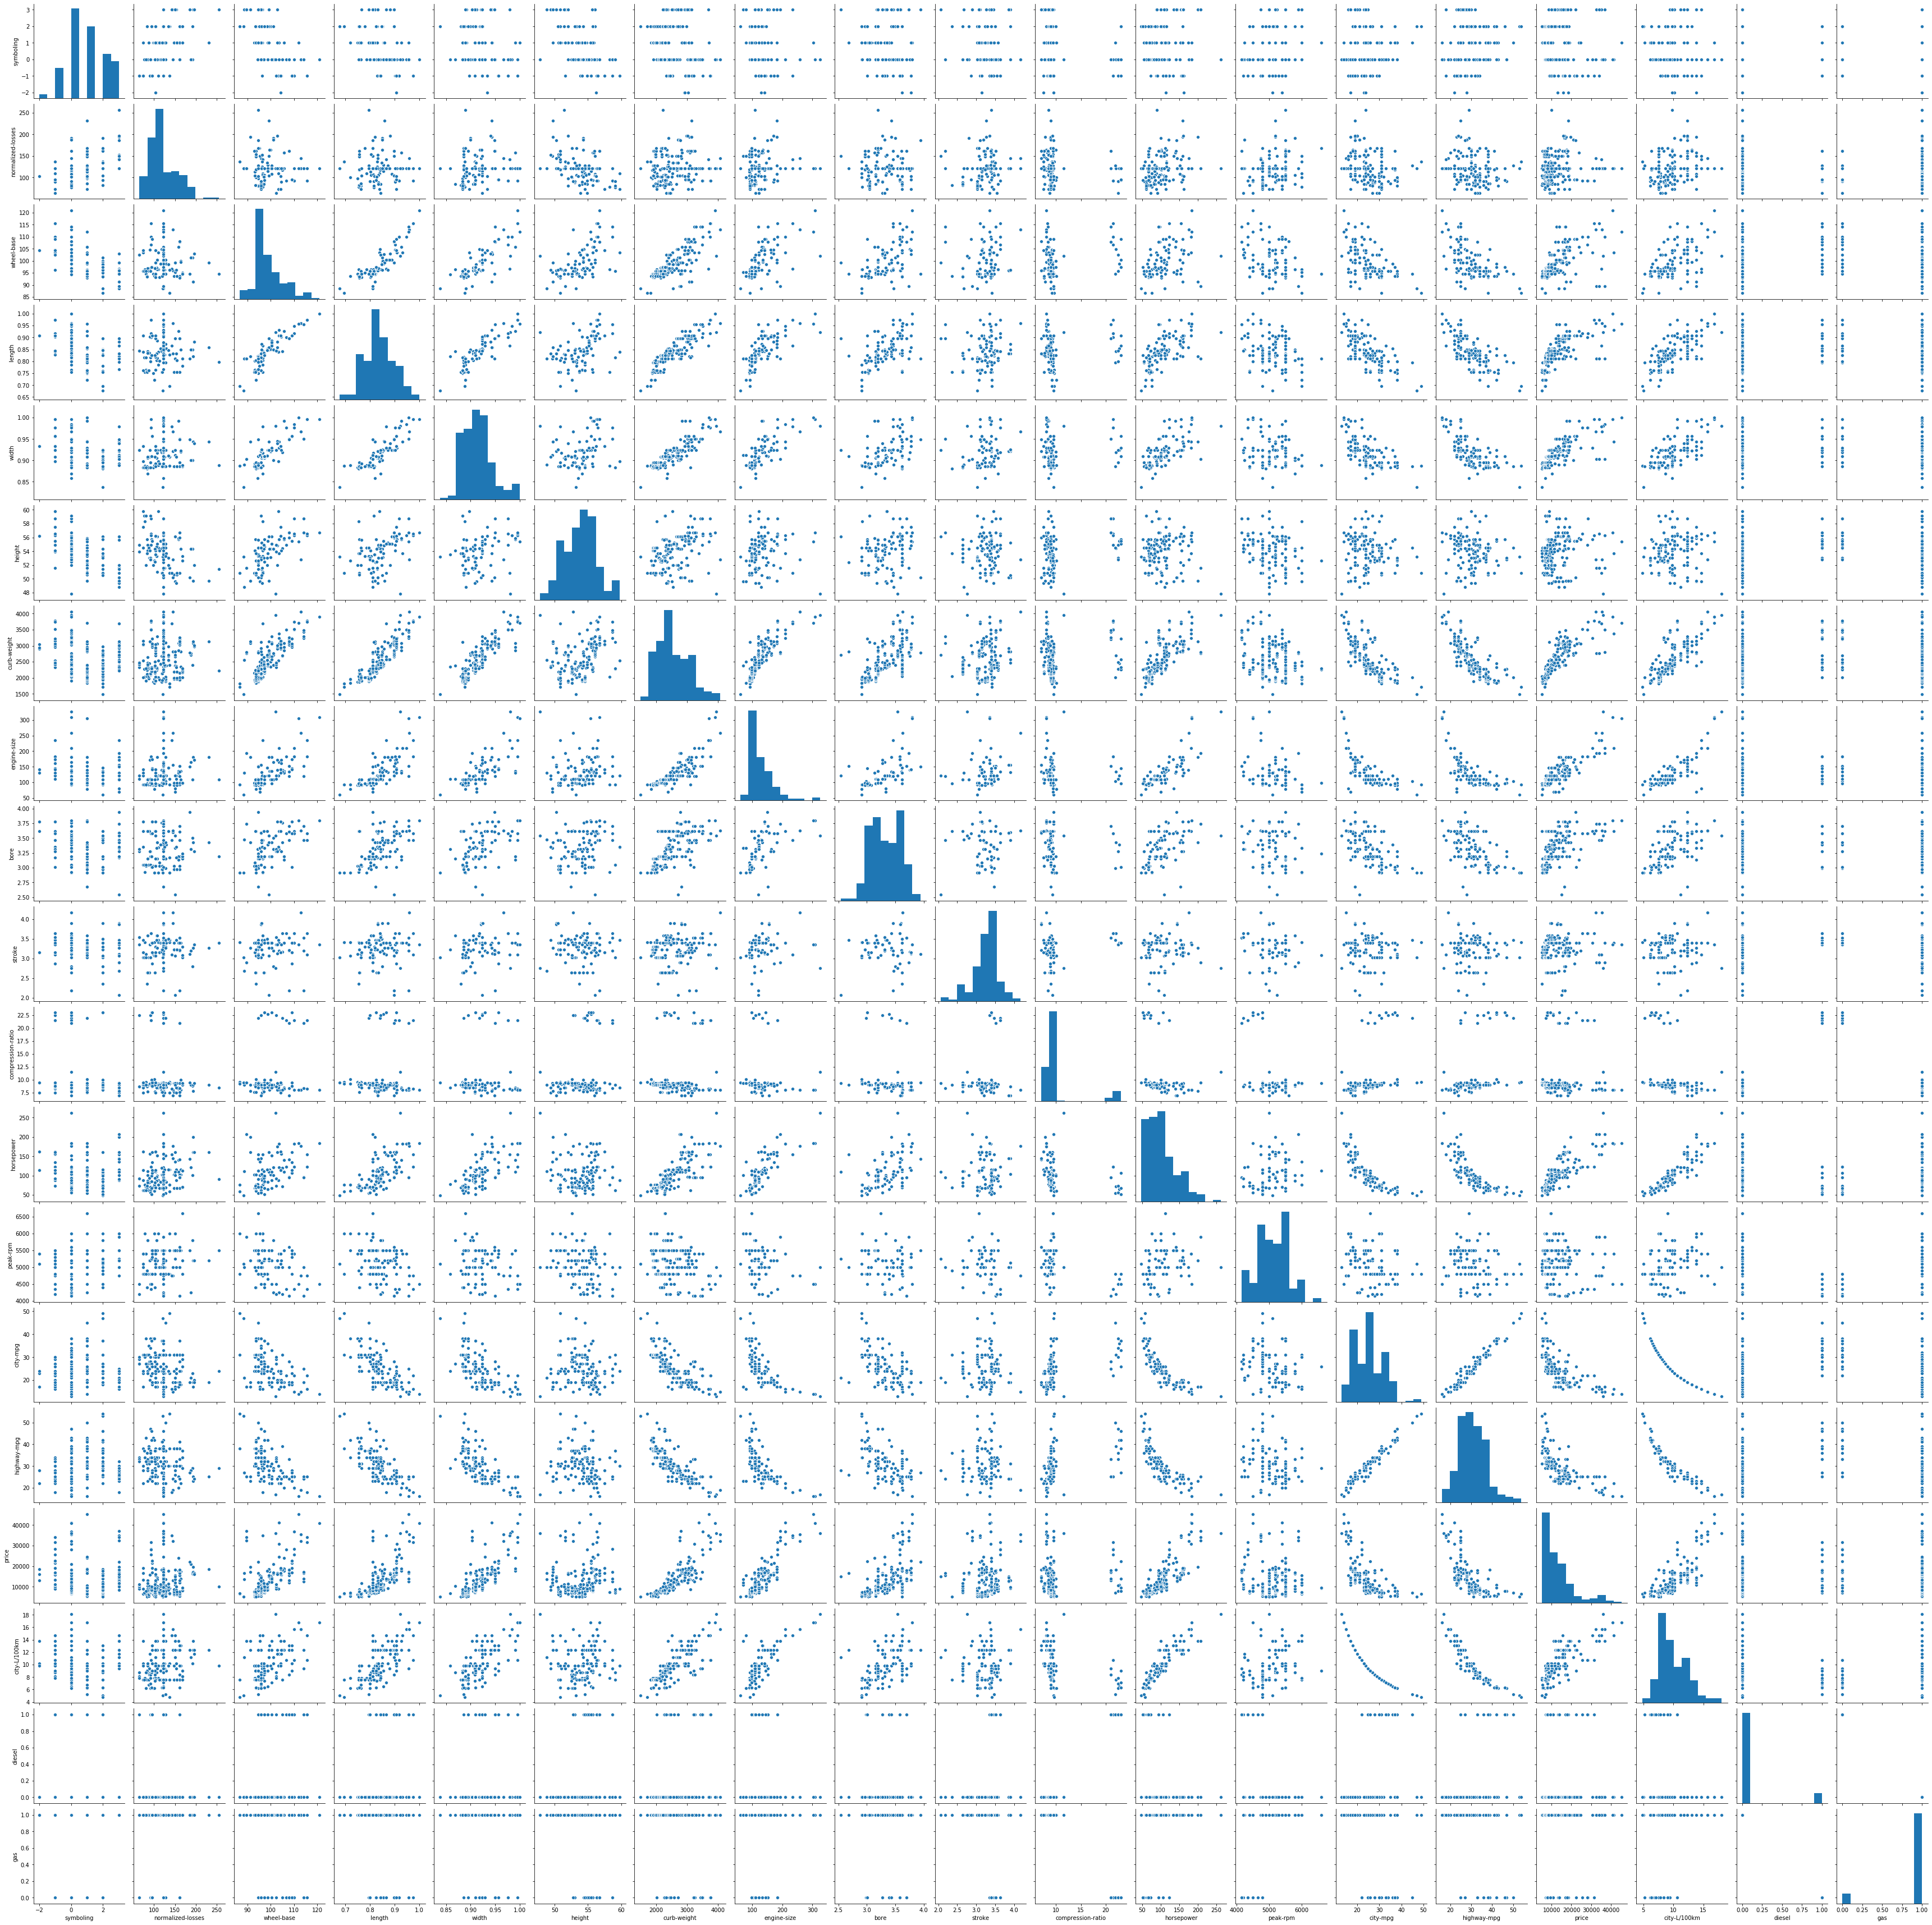

In [9]:
sns.pairplot(car)
plt.show()

#### Heatmap of the correlation

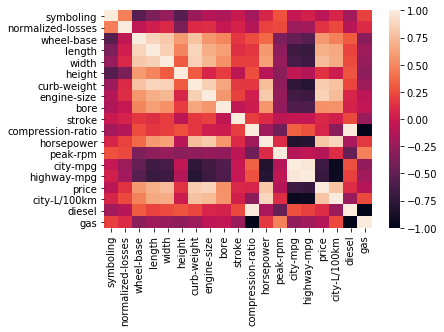

In [10]:
sns.heatmap(correlation)
plt.show()

#### Plotting a boxplot to compare body-style  and other categorical variables to price of the car

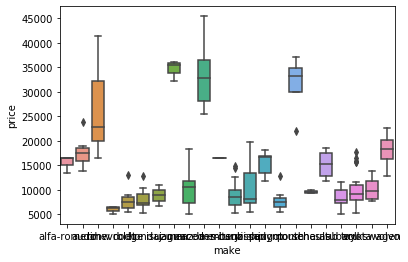

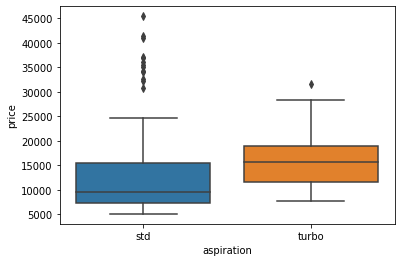

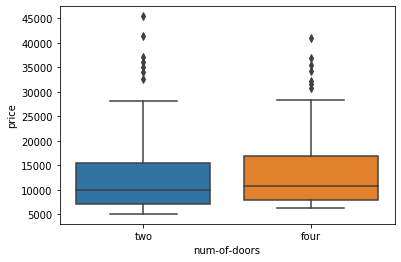

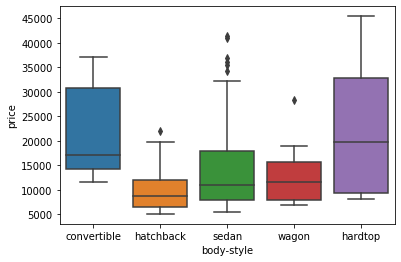

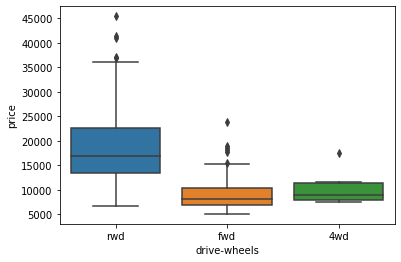

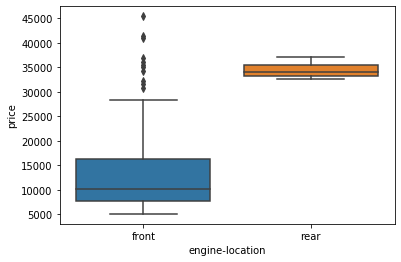

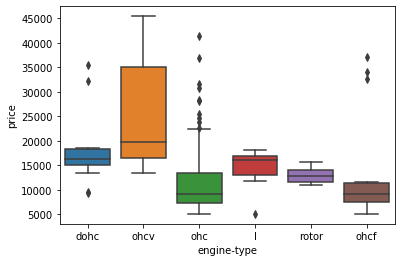

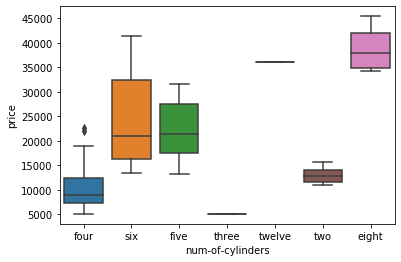

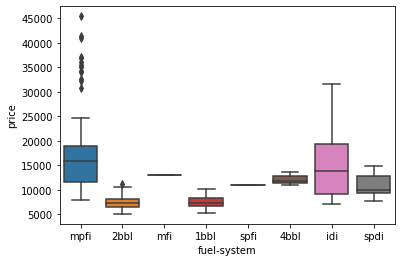

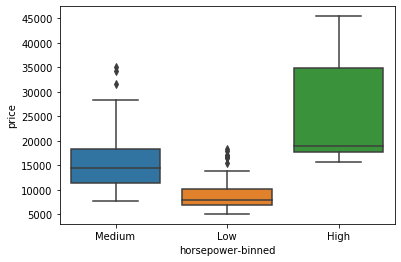

In [11]:
for i in car.describe(include = np.object).columns:
    sns.boxplot(x=car[i], y=car.price)
    plt.show()

<h3>Observations :-</h3> <br>
<b>body-style</b> - More or less the price range for every body type car is well defined with rarely any outliers, with the excpetion of sedan. There are a lot of sport sedans which cost more than the average sedan and cost more and hence are outliers in the data. <br>
<b>drive-wheelse</b> - Majority of the cars have rear wheel drive and have very few outliers. Cars with front wheel or all wheel drive are fairly less and have a very short and well defined range for their price. <br>
<b>engine-locatione</b> - Again, the majority of the cars have enging in the front and the and have a well defined price range. The cars with rear engines and the outliers of cars with front engines are majorly sports cars and that is why they are priced higher overall. <br>
<b>horsepower-binned</b> - We can see that as the horsepower of a car increases, the price of the car also increases and the range to define the price of a car with low, medium or high horsepower gets broaded and broader. <br>

####  Using describe function to get statistics for numerical variables

In [12]:
car.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


#### Using describe function to get statistics of categorical variables

In [13]:
car.describe(include=np.object)

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Getting unique values in each categorical variable along with their frequency

In [14]:
for i in car.describe(include=np.object).columns:
    print(i)
    print(car[i].value_counts())
    print('---')

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
---
aspiration
std      165
turbo     36
Name: aspiration, dtype: int64
---
num-of-doors
four    115
two      86
Name: num-of-doors, dtype: int64
---
body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
---
drive-wheels
fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64
---
engine-location
front    198
rear       3
Name: engine-location, dtype: int64
---
engine-type
ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
ro

After observing certain groups we can say that certain segments are most sold. <br>
For eg. majority of the cars have <b>standard aspiration</b>, prefer <b>4 door</b> cars over 2 doors, <b>sedan and hatchback</b> are the most sought after models. We can also see that people like their <b>car engines in the front</b>, and engine type of <b>ohc</b> with majority having <b>6 cylinders</b>.

#### Using groupby() to get the average price of “drive-wheels” and other categorical Variables with respect to “price” 

In [15]:
for i in car.describe(include=np.object).columns:
    print(car.groupby(i)['price'].mean())
    print('----')

make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64
----
aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64
----
num-of-doors
four    13498.034783
two     12818.127907
Name: price, dtype: float64
----
body-style
convertible    21890.500000
hardtop        22208.500000
hatchback       9957.441176
sedan          14459.755319
wag

<h3>Observations:-</h3><br>
We can see that the average price of cars with rear wheel drive is more than that of other cars. We can infer two major things from this:-<br>
As we had seen earlier that a large proportion of the cars (38-39%) had <b>rear wheel drive</b> and the prices of these cars ranged from <b>very low</b> to <b>very high</b>, that is why we could be seeing a high average for cars with <b> rear wheel drive</b>. <br>
We also see that the <b>4 wheel drive</b> cars have a relatively high average even though there are very very few cars of that type (3-4%). We obtain this avergae because all the cars are relatively evenly priced and thus there is a lot less range in the price of the cars with 4 wheel drive which can affect the average price.

#### Using groupby() to find the average price for “drive-wheels” and ”body-style” with price

In [16]:
temp = car.groupby(['drive-wheels','body-style'])['price'].mean()
temp

drive-wheels  body-style 
4wd           hatchback       7603.000000
              sedan          12647.333333
              wagon           9095.750000
fwd           convertible    11595.000000
              hardtop         8249.000000
              hatchback       8396.387755
              sedan           9811.800000
              wagon           9997.333333
rwd           convertible    23949.600000
              hardtop        24202.714286
              hatchback      14337.777778
              sedan          21711.833333
              wagon          16994.222222
Name: price, dtype: float64

<h3>Observations:-</h3><br>
<u>4wd</u>- We can see that there are <b>no convertibles or hardtops</b> in the 4 wheel drive and the avergae price of <b>sedan cars</b> is the most in a 4 wheel drive system.<br>
<u>fwd</u>- We can see that <b>convertibles</b> have a higher overall price average in forward wheel drive, while <b>hatchback and hardtop</b> and <b>sedan and wagon</b> are relatively close in their average pricing.<br>
<u>rwd</u>- We can see that rear wheel drive convertibles are the most expensive closely followed by the hardtop cars

#### Making a pivot table for it

In [17]:
temp = car[['drive-wheels','body-style','price']]
for_pivot = temp.groupby(['drive-wheels','body-style'], as_index=False).mean()
piv1 = for_pivot.pivot(index = 'drive-wheels', columns = 'body-style')
piv1

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

<h3>Observations</h3><br>
Same as above

#### Doing the same thing for other variables

In [18]:
cols = car.describe(include=np.object).columns
redundant = []
for i in cols:
    redundant.append(i)
    for j in cols:
        if i==j or j in redundant:
            continue
        else:
            #print(i,' and ',' with respect to price')
            temp = car.groupby([i,j])['price'].mean()
            print(temp, end='\n\n')
            temp = car[[i,j,'price']]
            for_pivot = temp.groupby([i,j], as_index=False).mean()
            piv = for_pivot.pivot(index = i, columns = j)
            piv.replace(np.nan, '-', inplace= True)
            print('Pivot Table')
            print(piv)
            print('------', end='\n\n')

make           aspiration
alfa-romero    std           15498.333333
audi           std           16656.000000
               turbo         23875.000000
bmw            std           26118.750000
chevrolet      std            6007.000000
dodge          std            6900.000000
               turbo          9826.333333
honda          std            8184.692308
isuzu          std            8916.500000
jaguar         std           34600.000000
mazda          std           10652.882353
mercedes-benz  std           38900.000000
               turbo         28394.000000
mercury        turbo         16503.000000
mitsubishi     std            7314.714286
               turbo         11485.666667
nissan         std            9869.588235
               turbo         19699.000000
peugot         std           14649.000000
               turbo         16189.166667
plymouth       std            7004.600000
               turbo         10360.500000
porsche        std           31400.500000
renault 

Pivot Table
                        price       
engine-location         front   rear
make                                
alfa-romero      15498.333333      -
audi             17859.166667      -
bmw              26118.750000      -
chevrolet         6007.000000      -
dodge             7875.444444      -
honda             8184.692308      -
isuzu             8916.500000      -
jaguar           34600.000000      -
mazda            10652.882353      -
mercedes-benz    33647.000000      -
mercury          16503.000000      -
mitsubishi        9239.769231      -
nissan           10415.666667      -
peugot           15489.090909      -
plymouth          7963.428571      -
porsche          22018.000000  34528
renault           9595.000000      -
saab             15223.333333      -
subaru            8541.250000      -
toyota            9885.812500      -
volkswagen       10077.500000      -
volvo            18063.181818      -
------

make           engine-type
alfa-romero    dohc         

Pivot Table
                     price                            
drive-wheels           4wd           fwd           rwd
aspiration                                            
std            9829.166667   8724.029412  19660.245614
turbo         11476.500000  12564.562500  20065.944444
------

aspiration  engine-location
std         front              12135.037037
            rear               34528.000000
turbo       front              16254.805556
Name: price, dtype: float64

Pivot Table
                        price       
engine-location         front   rear
aspiration                          
std              12135.037037  34528
turbo            16254.805556      -
------

aspiration  engine-type
std         dohc           18062.700000
            l              13066.000000
            ohc            10572.091667
            ohcf           14086.615385
            ohcv           25548.333333
            rotor          13020.000000
turbo       dohc           18385.000000
       

Name: price, dtype: float64

Pivot Table
                price                            
drive-wheels      4wd           fwd           rwd
body-style                                       
convertible         -  11595.000000  23949.600000
hardtop             -   8249.000000  24202.714286
hatchback        7603   8396.387755  14337.777778
sedan         12647.3   9811.800000  21711.833333
wagon         9095.75   9997.333333  16994.222222
------

body-style   engine-location
convertible  front              18863.000000
             rear               37028.000000
hardtop      front              18518.666667
             rear               33278.000000
hatchback    front               9957.441176
sedan        front              14459.755319
wagon        front              12371.960000
Name: price, dtype: float64

Pivot Table
                        price       
engine-location         front   rear
body-style                          
convertible      18863.000000  37028
hardtop          1

engine-location  num-of-cylinders
front            eight               38900.000000
                 five                22007.600000
                 four                10303.197452
                 six                 22120.952381
                 three                5151.000000
                 twelve              36000.000000
                 two                 13020.000000
rear             six                 34528.000000
Name: price, dtype: float64

Pivot Table
                  price                                                    
num-of-cylinders  eight     five     four           six three twelve    two
engine-location                                                            
front             38900  22007.6  10303.2  22120.952381  5151  36000  13020
rear                  -        -        -  34528.000000     -      -      -
------

engine-location  fuel-system
front            1bbl            7555.545455
                 2bbl            7433.203125
                 4

<h3>Observations :-</h3><br>
We can see that there are no cars with medium or low horsepower which have their engine in rear. These are majorly the sports cars of segment. We also see that of all the segments, the cars having engine in the front and with low horsepower have the lowest average price of any car.

#### Plotting a heatmap for the table

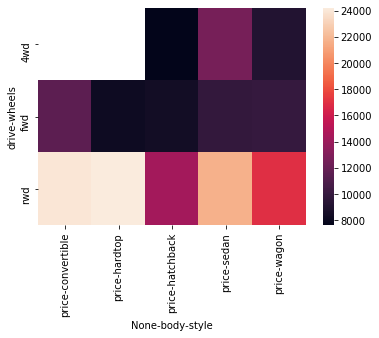

In [19]:
#Heatmap for drive-wheels and body-style in relation to their price
sns.heatmap(piv1)

#### Finding pearson coefficient between 'wheel-base' and 'price'

In [20]:
from scipy.stats import pearsonr
pear, p_val = pearsonr(car['wheel-base'], car['price'])
print(pear, p_val)

0.584641822265508 8.076488270733218e-20


#### Doing a one way anova test if different groups of 'drive-wheels' are correlated with 'price'

In [21]:
from scipy import stats
temp1 = car[['drive-wheels', 'body-style','price']]
temp = temp1[['drive-wheels', 'price']].groupby(['drive-wheels'])
temp
f_val, p_val = stats.f_oneway(temp.get_group('fwd')['price'], 
                              temp.get_group('4wd')['price'], 
                              temp.get_group('rwd')['price'])
print(f_val, p_val)

67.95406500780398 3.3945443577151245e-23
